<a href="https://colab.research.google.com/github/Shubham-Bhoite/Machine-Learning/blob/main/ML_Assi_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pylab
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn import preprocessing

## **Loading the Dataset**
First we load the dataset and find out the number of columns, rows, NULL values, etc.

In [9]:
df = pd.read_csv('/content/uber.csv')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44647 entries, 0 to 44646
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         44647 non-null  int64  
 1   key                44647 non-null  object 
 2   fare_amount        44647 non-null  float64
 3   pickup_datetime    44647 non-null  object 
 4   pickup_longitude   44646 non-null  float64
 5   pickup_latitude    44646 non-null  float64
 6   dropoff_longitude  44646 non-null  float64
 7   dropoff_latitude   44646 non-null  float64
 8   passenger_count    44646 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 3.1+ MB


In [11]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1.0
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1.0
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1.0
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3.0
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5.0


In [12]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,4.464700e+04,44647.000000,44646.000000,44646.000000,44646.000000,44646.000000,44646.000000
mean,2.769186e+07,11.400106,-72.566735,39.951296,-72.587712,39.955902,1.678627
std,1.603608e+07,10.081083,10.756469,5.995164,10.667100,5.980302,1.295952
min,4.800000e+01,0.000000,-748.016667,-74.015515,-737.916665,-74.008745,0.000000
25%,1.374899e+07,6.000000,-73.992111,40.734764,-73.991485,40.733700,1.000000
50%,2.765935e+07,8.500000,-73.981854,40.752527,-73.980132,40.752906,1.000000
75%,4.153333e+07,12.500000,-73.967164,40.767136,-73.963706,40.768169,2.000000
max,5.542169e+07,350.000000,40.774042,45.031653,40.828377,45.031598,6.000000


## **Cleaning**

In [13]:
df = df.drop(['Unnamed: 0', 'key'], axis=1)

In [14]:
df.isna().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     1
pickup_latitude      1
dropoff_longitude    1
dropoff_latitude     1
passenger_count      1
dtype: int64

#### Remove null rows

In [15]:
df.dropna(axis=0,inplace=True)

In [16]:
df.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

#### Fix data type of `pickup_datetime` from `Object` to `DateTime`

In [17]:
df.pickup_datetime = pd.to_datetime(df.pickup_datetime, errors='coerce')

#### Separating the date and time into separate columns for more usability.

In [18]:
df= df.assign(
    second = df.pickup_datetime.dt.second,
    minute = df.pickup_datetime.dt.minute,
    hour = df.pickup_datetime.dt.hour,
    day= df.pickup_datetime.dt.day,
    month = df.pickup_datetime.dt.month,
    year = df.pickup_datetime.dt.year,
    dayofweek = df.pickup_datetime.dt.dayofweek
)
df = df.drop('pickup_datetime',axis=1)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44646 entries, 0 to 44645
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fare_amount        44646 non-null  float64
 1   pickup_longitude   44646 non-null  float64
 2   pickup_latitude    44646 non-null  float64
 3   dropoff_longitude  44646 non-null  float64
 4   dropoff_latitude   44646 non-null  float64
 5   passenger_count    44646 non-null  float64
 6   second             44646 non-null  int64  
 7   minute             44646 non-null  int64  
 8   hour               44646 non-null  int64  
 9   day                44646 non-null  int64  
 10  month              44646 non-null  int64  
 11  year               44646 non-null  int64  
 12  dayofweek          44646 non-null  int64  
dtypes: float64(6), int64(7)
memory usage: 4.8 MB


In [20]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,second,minute,hour,day,month,year,dayofweek
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,6,52,19,7,5,2015,3
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,56,4,20,17,7,2009,4
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,0,45,21,24,8,2009,0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,21,22,8,26,6,2009,4
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5.0,0,47,17,28,8,2014,3


## **Haversine Formula**
Calculatin the distance between the pickup and drop co-ordinates using the Haversine formual for accuracy.

![](https://www.geeksforgeeks.org/wp-content/ql-cache/quicklatex.com-7b7d66229e4a0b6c7bbf52b95a807dc4_l3.svg)

In [21]:
incorrect_coordinates = df.loc[
    (df.pickup_latitude > 90) |(df.pickup_latitude < -90) |
    (df.dropoff_latitude > 90) |(df.dropoff_latitude < -90) |
    (df.pickup_longitude > 180) |(df.pickup_longitude < -180) |
    (df.dropoff_longitude > 90) |(df.dropoff_longitude < -90)
]

df.drop(incorrect_coordinates, inplace = True, errors = 'ignore')

In [22]:
def distance_transform(longitude1, latitude1, longitude2, latitude2):
    long1, lati1, long2, lati2 = map(np.radians, [longitude1, latitude1, longitude2, latitude2])
    dist_long = long2 - long1
    dist_lati = lati2 - lati1
    a = np.sin(dist_lati/2)**2 + np.cos(lati1) * np.cos(lati2) * np.sin(dist_long/2)**2
    c = 2 * np.arcsin(np.sqrt(a)) * 6371
    # long1,lati1,long2,lati2 = longitude1[pos],latitude1[pos],longitude2[pos],latitude2[pos]
    # c = sqrt((long2 - long1) ** 2 + (lati2 - lati1) ** 2)asin

    return c

In [23]:
df['Distance'] = distance_transform(
    df['pickup_longitude'],
    df['pickup_latitude'],
    df['dropoff_longitude'],
    df['dropoff_latitude']
)

In [24]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,second,minute,hour,day,month,year,dayofweek,Distance
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,6,52,19,7,5,2015,3,1.683323
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,56,4,20,17,7,2009,4,2.457590
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,0,45,21,24,8,2009,0,5.036377
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,21,22,8,26,6,2009,4,1.661683
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5.0,0,47,17,28,8,2014,3,4.475450


## **Outliers**
We can get rid of the trips with very large distances that are outliers as well as trips with 0 distance.

Text(0, 0.5, 'fare_amount')

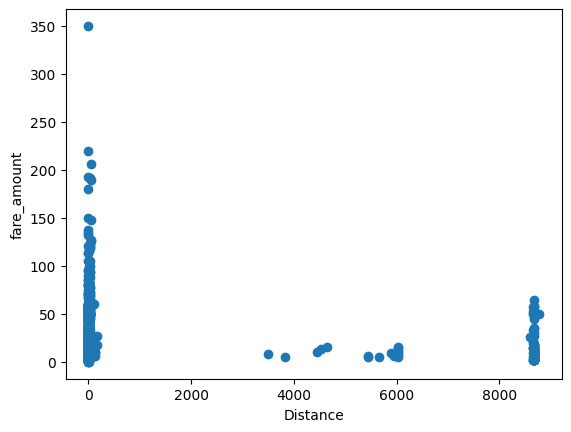

In [25]:
plt.scatter(df['Distance'], df['fare_amount'])
plt.xlabel("Distance")
plt.ylabel("fare_amount")

<Axes: >

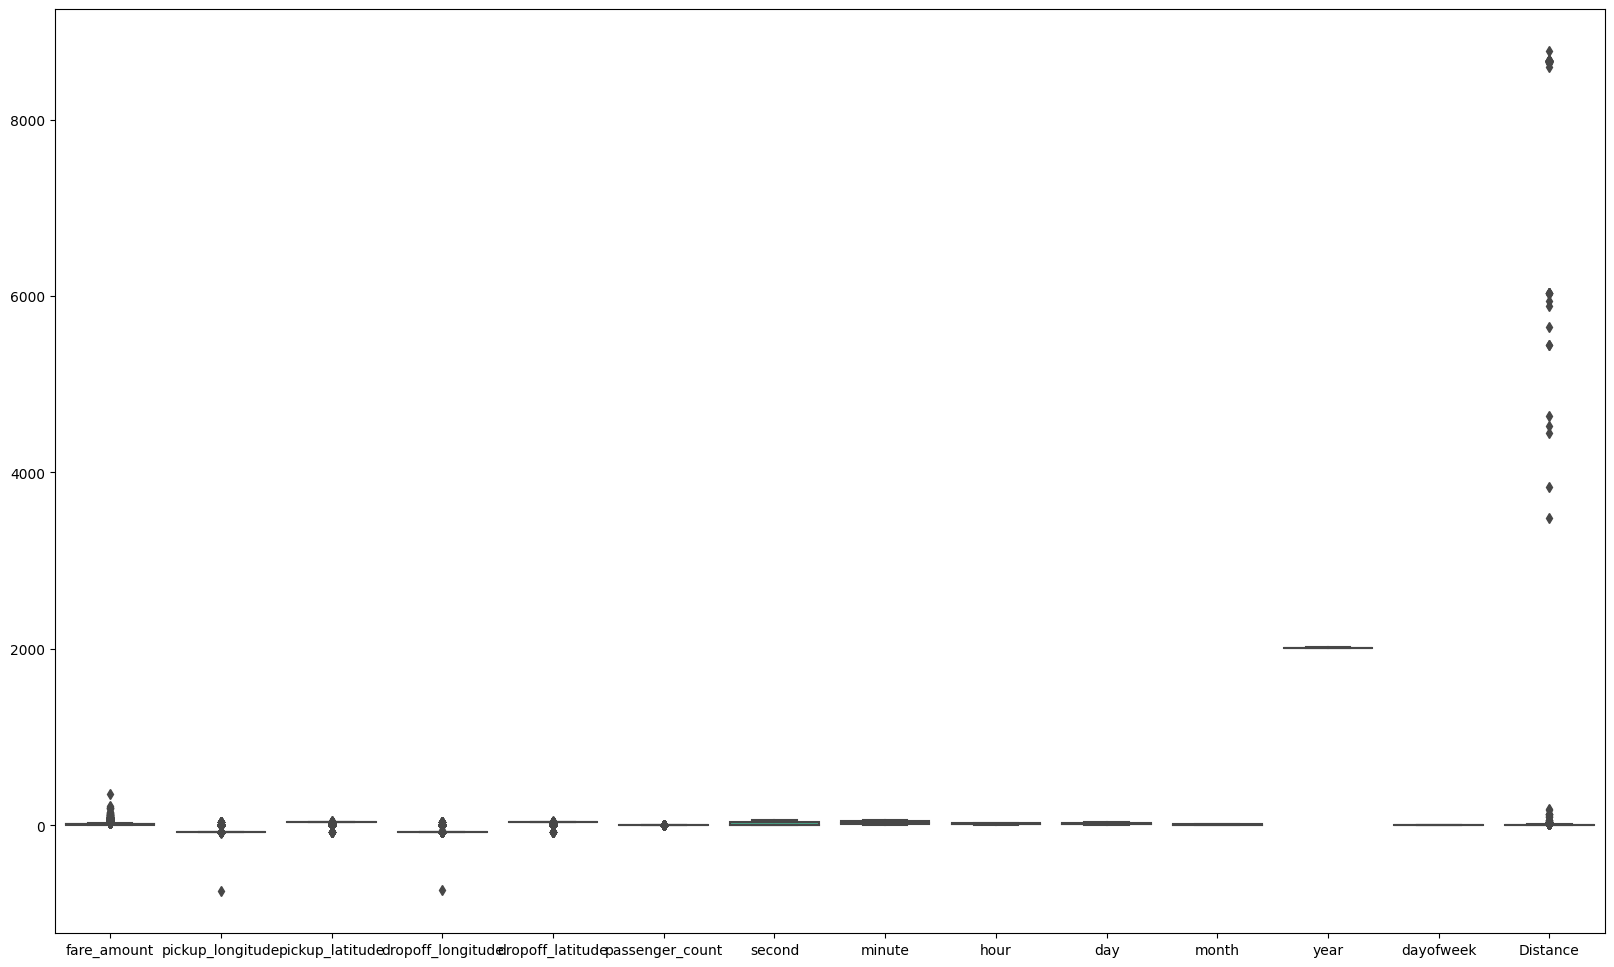

In [26]:
plt.figure(figsize=(20,12))
sns.boxplot(data = df)

In [27]:
df.drop(df[df['Distance'] >= 60].index, inplace = True)
df.drop(df[df['fare_amount'] <= 0].index, inplace = True)

df.drop(df[(df['fare_amount']>100) & (df['Distance']<1)].index, inplace = True )
df.drop(df[(df['fare_amount']<100) & (df['Distance']>100)].index, inplace = True )

Text(0, 0.5, 'fare_amount')

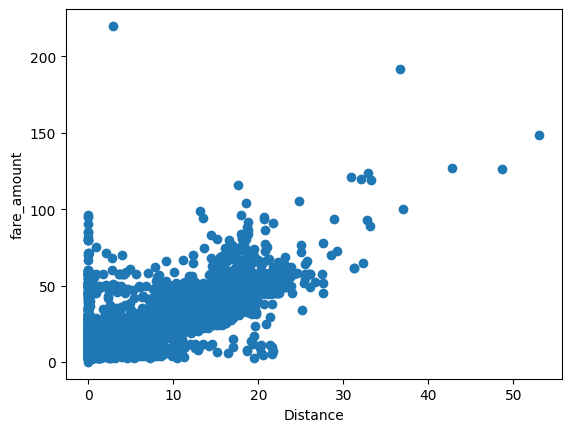

In [28]:
plt.scatter(df['Distance'], df['fare_amount'])
plt.xlabel("Distance")
plt.ylabel("fare_amount")

## **Coorelation Matrix**
To find the two variables that have the most inter-dependence

In [29]:
corr = df.corr()

corr.style.background_gradient(cmap='BuGn')

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,second,minute,hour,day,month,year,dayofweek,Distance
fare_amount,1.000000,0.017396,-0.017223,0.017034,-0.017144,0.009008,-0.005452,-0.005820,-0.009783,0.004965,0.026110,0.120635,0.001323,0.854878
pickup_longitude,0.017396,1.000000,-0.982730,0.999992,-0.982719,0.004256,-0.015268,0.006884,-0.003718,0.005892,-0.012064,0.002312,-0.006927,-0.113400
pickup_latitude,-0.017223,-0.982730,1.000000,-0.982738,0.999986,-0.006399,0.017664,-0.007194,0.005044,-0.009404,0.012830,-0.005047,0.003941,0.105376
dropoff_longitude,0.017034,0.999992,-0.982738,1.000000,-0.982726,0.004246,-0.015204,0.006900,-0.003966,0.005916,-0.012053,0.002304,-0.006848,-0.113625
dropoff_latitude,-0.017144,-0.982719,0.999986,-0.982726,1.000000,-0.006383,0.017645,-0.007184,0.005037,-0.009417,0.012827,-0.005019,0.003966,0.105669
passenger_count,0.009008,0.004256,-0.006399,0.004246,-0.006383,1.000000,-0.214672,-0.000370,0.017674,0.007526,0.008948,0.001611,0.032846,0.010354
second,-0.005452,-0.015268,0.017664,-0.015204,0.017645,-0.214672,1.000000,-0.005782,-0.015219,-0.002325,-0.050242,0.085017,0.000496,-0.007445
minute,-0.005820,0.006884,-0.007194,0.006900,-0.007184,-0.000370,-0.005782,1.000000,0.003106,-0.006491,0.003759,-0.000540,-0.008280,-0.006471
hour,-0.009783,-0.003718,0.005044,-0.003966,0.005037,0.017674,-0.015219,0.003106,1.000000,0.005105,-0.007016,0.001753,-0.092710,-0.024121
day,0.004965,0.005892,-0.009404,0.005916,-0.009417,0.007526,-0.002325,-0.006491,0.005105,1.000000,-0.016808,-0.012533,0.004747,0.000175


# **Standardization**
For more accurate results on our linear regression model

In [30]:
X = df['Distance'].values.reshape(-1, 1)        #Independent Variable
y = df['fare_amount'].values.reshape(-1, 1)     #Dependent Variable

In [31]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
y_std = std.fit_transform(y)
print(y_std)

x_std = std.fit_transform(X)
print(x_std)

[[-0.39803961]
 [-0.37734699]
 [ 0.16066133]
 ...
 [ 0.74005491]
 [-0.74981428]
 [ 0.36758761]]
[[-0.43855057]
 [-0.22397938]
 [ 0.49067509]
 ...
 [ 0.87031113]
 [-0.60703158]
 [ 1.05397026]]


# **Splitting the Dataset**
Training and Test Set

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_std, y_std, test_size=0.2, random_state=0)

# **Simple Linear Regression**
Training the simple linear regression model on the training set

In [33]:
from sklearn.linear_model import LinearRegression
l_reg = LinearRegression()
l_reg.fit(X_train, y_train)

print("Training set score: {:.2f}".format(l_reg.score(X_train, y_train)))
print("Test set score: {:.7f}".format(l_reg.score(X_test, y_test)))

Training set score: 0.74
Test set score: 0.6833157


In [34]:
y_pred = l_reg.predict(X_test)

result = pd.DataFrame()
result[['Actual']] = y_test
result[['Predicted']] = y_pred

result.sample(10)

,Actual,Predicted
6828,-0.191113,0.031399
4435,1.102176,0.304318
6143,-0.553234,-0.518390
8339,0.491743,0.540498
1199,-0.398040,-0.192090
3468,-0.191113,-0.428106
2105,-0.708429,-0.426261
1318,-0.035919,-0.193409
8885,-0.832585,-0.699930
3228,0.533129,0.439683


In [35]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Absolute % Error:', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared (R²):', np.sqrt(metrics.r2_score(y_test, y_pred)))

Mean Absolute Error: 0.2653412136163408
Mean Absolute % Error: 1.4045364106292344
Mean Squared Error: 0.32367286247748095
Root Mean Squared Error: 0.5689225452357122
R Squared (R²): 0.8266291243446869


#### **Visualization**

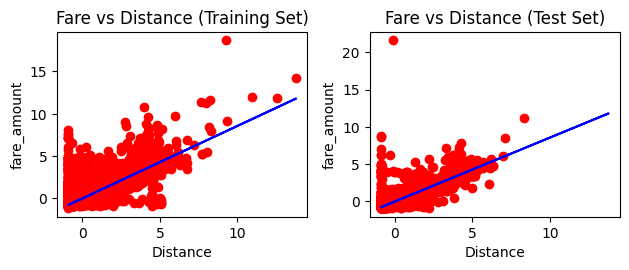

In [36]:
plt.subplot(2, 2, 1)
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, l_reg.predict(X_train), color ="blue")
plt.title("Fare vs Distance (Training Set)")
plt.ylabel("fare_amount")
plt.xlabel("Distance")

plt.subplot(2, 2, 2)
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, l_reg.predict(X_train), color ="blue")
plt.ylabel("fare_amount")
plt.xlabel("Distance")
plt.title("Fare vs Distance (Test Set)")

plt.tight_layout()
plt.show()

In [37]:
cols = ['Model', 'RMSE', 'R-Squared']

# create a empty dataframe of the colums
# columns: specifies the columns to be selected
result_tabulation = pd.DataFrame(columns = cols)

# compile the required information
linreg_metrics = pd.DataFrame([[
     "Linear Regresion model",
     np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
     np.sqrt(metrics.r2_score(y_test, y_pred))
]], columns = cols)

result_tabulation = pd.concat([result_tabulation, linreg_metrics], ignore_index=True)

result_tabulation

,Model,RMSE,R-Squared
0,Linear Regresion model,0.568923,0.826629


# **RandomForestRegressor**
Training the RandomForestRegressor model on the training set

In [38]:
rf_reg = RandomForestRegressor(n_estimators=100, random_state=10)

# fit the regressor with training dataset
rf_reg.fit(X_train, y_train)

<ipython-input-38-23bf85fdec00>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg.fit(X_train, y_train)


RandomForestRegressor(random_state=10)

In [39]:
# predict the values on test dataset using predict()
y_pred_RF = rf_reg.predict(X_test)

result = pd.DataFrame()
result[['Actual']] = y_test
result['Predicted'] = y_pred_RF

result.sample(10)

,Actual,Predicted
3156,-0.501503,-0.625245
4193,-0.553234,-0.511849
8013,-0.398040,0.044392
797,0.119276,0.484708
6171,0.326202,0.224498
7738,0.243432,0.189217
8349,-0.335962,-0.141761
2234,-0.791200,-0.667147
5095,-0.346308,-0.231567
4949,-0.542888,-0.457634


In [40]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_RF))
print('Mean Absolute % Error:', metrics.mean_absolute_percentage_error(y_test, y_pred_RF))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_RF))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_RF)))
print('R Squared (R²):', np.sqrt(metrics.r2_score(y_test, y_pred_RF)))

Mean Absolute Error: 0.30993371163290273
Mean Absolute % Error: 1.6745165430594873
Mean Squared Error: 0.37640165875481024
Root Mean Squared Error: 0.6135158178521645
R Squared (R²): 0.7948115531141686


#### **Visualization**

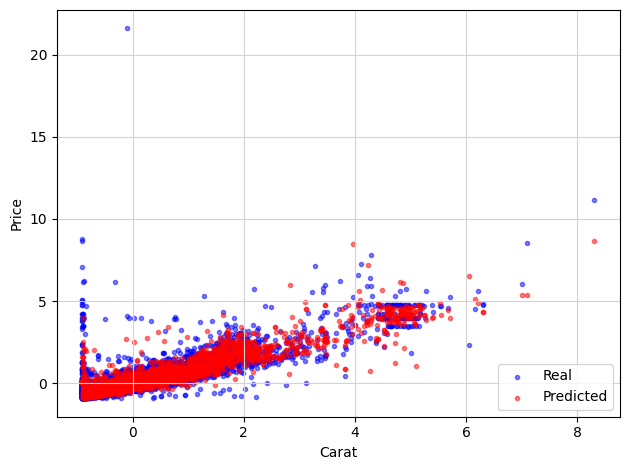

In [41]:
# Build scatterplot
plt.scatter(X_test, y_test, c = 'b', alpha = 0.5, marker = '.', label = 'Real')
plt.scatter(X_test, y_pred_RF, c = 'r', alpha = 0.5, marker = '.', label = 'Predicted')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.grid(color = '#D3D3D3', linestyle = 'solid')
plt.legend(loc = 'lower right')


plt.tight_layout()
plt.show()

In [42]:
# compile the required information
random_forest_metrics = pd.DataFrame([[
     "Random Forest Regressor model",
     np.sqrt(metrics.mean_squared_error(y_test, y_pred_RF)),
     np.sqrt(metrics.r2_score(y_test, y_pred_RF))
]], columns = cols)

result_tabulation = pd.concat([result_tabulation, random_forest_metrics], ignore_index=True)

result_tabulation

,Model,RMSE,R-Squared
0,Linear Regresion model,0.568923,0.826629
1,Random Forest Regressor model,0.613516,0.794812
